In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.helper_functions import *

# The Significant Bang Theory

source
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegressionCV
import numpy as np
import pandas as pd

# Prepare train/test splits (df_train, df_test are defined earlier)
with open('helpers/stopwords.txt') as f:
    stopwords = [w.strip() for w in f.readlines()]

vectorizer = TfidfVectorizer(min_df=2, stop_words=stopwords, tokenizer=simple_tokeniser)
X_train = vectorizer.fit_transform(df_train['Line'])
X_test = vectorizer.transform(df_test['Line'])

y_train = (df_train['Character'] == 'Sheldon').astype(int).values
y_test = (df_test['Character'] == 'Sheldon').astype(int).values

# Truncated SVD to 25 dims
svd = TruncatedSVD(n_components=25, random_state=0)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Logistic regression with 10-fold CV
clf = LogisticRegressionCV(Cs=5, cv=10, max_iter=1000, solver='liblinear')
clf.fit(X_train_svd, y_train)

# Predictions and probabilities
y_train_prob = clf.predict_proba(X_train_svd)[:, 1]
y_test_prob = clf.predict_proba(X_test_svd)[:, 1]
y_train_pred = (y_train_prob >= 0.5).astype(int)
y_test_pred = (y_test_prob >= 0.5).astype(int)

def precision_recall_f1(y_true, y_pred, positive_label=1):
    tp = int(((y_true == positive_label) & (y_pred == positive_label)).sum())
    fp = int(((y_true != positive_label) & (y_pred == positive_label)).sum())
    fn = int(((y_true == positive_label) & (y_pred != positive_label)).sum())
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    return precision, recall, f1

# Training metrics
p_train_pos, r_train_pos, f1_train_pos = precision_recall_f1(y_train, y_train_pred, positive_label=1)
p_train_neg, r_train_neg, f1_train_neg = precision_recall_f1(1 - y_train, 1 - y_train_pred, positive_label=1)
acc_train = (y_train == y_train_pred).mean()

# Test metrics
p_test_pos, r_test_pos, f1_test_pos = precision_recall_f1(y_test, y_test_pred, positive_label=1)
p_test_neg, r_test_neg, f1_test_neg = precision_recall_f1(1 - y_test, 1 - y_test_pred, positive_label=1)
acc_test = (y_test == y_test_pred).mean()

print('Training -- Sheldon (pos): precision, recall, f1 =', p_train_pos, r_train_pos, f1_train_pos)
print('Training -- not-Sheldon (neg): precision, recall, f1 =', p_train_neg, r_train_neg, f1_train_neg)
print('Training accuracy =', acc_train)
print('Test -- Sheldon (pos): precision, recall, f1 =', p_test_pos, r_test_pos, f1_test_pos)
print('Test -- not-Sheldon (neg): precision, recall, f1 =', p_test_neg, r_test_neg, f1_test_neg)
print('Test accuracy =', acc_test)

# iii) Most extreme false positives and false negatives by predicted probability
test_df = df_test.reset_index(drop=True).copy()
test_df['y_true'] = y_test
test_df['y_prob'] = y_test_prob
test_df['y_pred'] = y_test_pred

false_positives = test_df[(test_df['y_true'] == 0) & (test_df['y_pred'] == 1)].copy()
false_negatives = test_df[(test_df['y_true'] == 1) & (test_df['y_pred'] == 0)].copy()

top10_fp = false_positives.sort_values('y_prob', ascending=False).head(10)
top10_fn = false_negatives.sort_values('y_prob', ascending=True).head(10)

print('Top 10 false positives (highest P(Sheldon) but not Sheldon):')
for i, row in top10_fp.iterrows():
    print(row['Character'], float(row['y_prob']), row['Line'])

print('


























results}    'top5_words': top5_words    'top10_fn': top10_fn,    'top10_fp': top10_fp,    },        'test': {'precision_pos': p_test_pos, 'recall_pos': r_test_pos, 'f1_pos': f1_test_pos, 'acc': acc_test}        'train': {'precision_pos': p_train_pos, 'recall_pos': r_train_pos, 'f1_pos': f1_train_pos, 'acc': acc_train},    'metrics': {    'vectorizer': vectorizer,    'svd': svd,    'clf': clf,results = {print('Top 5 words for that SVD component:', top5_words)print('
Most important SVD dim:', most_important_dim)top5_words = [feature_names[i] for i in top5_idx]top5_idx = np.argsort(np.abs(component_weights))[::-1][:5]feature_names = vectorizer.get_feature_names_out()component_weights = svd.components_[most_important_dim]most_important_dim = int(np.argmax(np.abs(coef)))coef = clf.coef_.ravel()# iv) Most important SVD feature in the logistic model    print(row['Character'], float(row['y_prob']), row['Line'])for i, row in top10_fn.iterrows():Top 10 false negatives (lowest P(Sheldon) but actually Sheldon):')

In [3]:
df.groupby("Series")["Scene"].count().reset_index()

,Series,Scene
0,01,4136
1,02,5238
2,03,5030
3,04,5604
4,05,4847
5,06,4885
6,07,5345
7,08,5269
8,09,5418
9,10,5520


**Q2**. (5 points) Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

_Hint: "I know all the recurrent characters because I've watched the entire series five times" is not an acceptable argument, so you need to actually generate the list._

In [4]:
character_episode_counts = df.groupby("Character")["Episode"].nunique().reset_index()
recurrent_characters = character_episode_counts[character_episode_counts["Episode"] > 1]["Character"]
recurrent_characters

2             Adam
4             Alex
5           Alfred
8              All
10             Amy
          ...     
192    Wil Wheaton
193          Woman
194    Woman on TV
195          Wyatt
196           Zack
Name: Character, Length: 84, dtype: object

In [5]:
recurrent_chars_line_counts = df[df["Character"].isin(recurrent_characters)].groupby("Character")["Line"].count().reset_index()
recurrent_characters = recurrent_chars_line_counts[recurrent_chars_line_counts["Line"] > 90]
recurrent_characters

,Character,Line
4,Amy,3472
5,Arthur,130
9,Bernadette,2690
10,Bert,95
11,Beverley,162
21,Emily,164
29,Howard,5872
37,Kripke,106
40,Leonard,9829
43,Leslie,116


In [41]:
recurrent_characters = recurrent_characters[recurrent_characters["Character"] != "Man"]["Character"]
recurrent_characters

4              Amy
5           Arthur
9       Bernadette
10            Bert
11        Beverley
21           Emily
29          Howard
37          Kripke
40         Leonard
43          Leslie
51      Mrs Cooper
55    Mrs Wolowitz
57           Penny
60           Priya
61             Raj
67         Sheldon
72          Stuart
78             Wil
83            Zack
Name: Character, dtype: object

## Task B: Read the ~~stats~~ scripts carefully (30 points)

### Part 1: Don't put the shovel down just yet

**Q3**. (2.5 points) From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [7]:
def process_line(line: str):
    for char in EXCLUDE_CHARS:
        line = line.replace(char, " ")

    return line.lower()

df["Line"] = df["Line"].apply(process_line)

**Q4**. (5 points) For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

Text(0, 0.5, 'count')

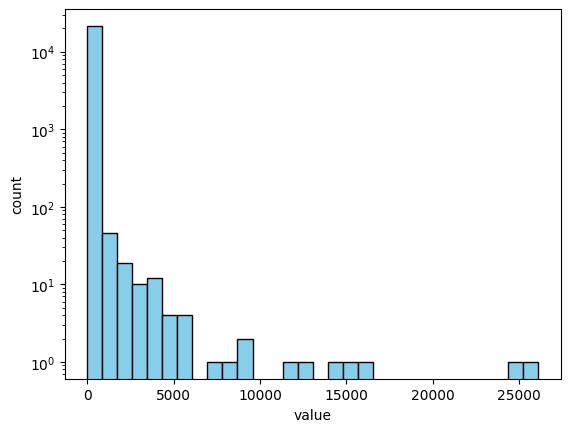

In [26]:
df["Tokens"] = df["Line"].apply(simple_tokeniser)
df["N_Words"] = df["Tokens"].apply(lambda tokens: len(tokens))
corpus = {}
for tokens in df["Tokens"]:
    for token in tokens:
        if token not in corpus.keys():
            corpus[token] = 1
        else:
            corpus[token] += 1

plt.hist(corpus.values(), bins=30, color='skyblue', edgecolor='k')
plt.yscale("log")
plt.xlabel('value')
plt.ylabel('count')

### Part 2: Talkativity
**Q5**. (2.5 points) For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [53]:
most_talkative_chars = df[df["Character"].isin(recurrent_characters)].groupby("Character")["N_Words"].sum().sort_values(ascending=False).reset_index()
print("The most talkative character is", most_talkative_chars.iloc[0]["Character"])

The most talkative character is Sheldon


**Q6**. (12.5 points) For each of the recurrent characters, calculate their total number of words uttered per episode (ignoring episodes that the character does not appear in), and calculate a **robust summary statistic** for the word count distribution of each person.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (2.5 points) What changes do you observe, compared to the analysis in Q5?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (2.5 points) Why is this analysis an improvement over the previous one, and how could you improve it even further? _Hint: The improvement involves making your unit for word counts even more granular - you can go further down than episodes._

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (7.5 points) Incorporate that improvement. Do you still see the same results? How **confident** can you be that the "most talkative" person given by this twice improved method is really more talkative than the second most talkative one? _Hint: Read the question again. A good idea would be to use bootstrapping and calculate your summary statistic on each bootstrapped set._

In [55]:
words_per_episode = df[df["Character"].isin(recurrent_characters)].groupby(["Character", "Episode"])["N_Words"].median().sort_values(ascending=False).reset_index()
words_per_episode

,Character,Episode,N_Words
0,Wil,Series 09 Episode 17 – The Celebration Experim...,58.0
1,Mrs Wolowitz,Series 05 Episode 19 – The Weekend Vortex,55.0
2,Raj,Series 04 Episode 21 – The Agreement Dissection,31.0
3,Amy,Series 05 Episode 06 – The Rhinitis Revelation,25.0
4,Sheldon,Series 06 Episode 12 – The Egg Salad Equivalency,24.0
...,...,...,...
1636,Howard,Series 05 Episode 13 – The Recombination Hypot...,2.5
1637,Leslie,Series 03 Episode 23 – The Lunar Excitation,2.0
1638,Raj,Series 01 Episode 10 – The Loobenfeld Decay,2.0
1639,Raj,Series 05 Episode 03 – The Pulled Groin Extrap...,1.0


In [57]:
words_per_episode.groupby("Character")["N_Words"].mean().sort_values(ascending=False).reset_index()

,Character,N_Words
0,Wil,13.500000
1,Sheldon,12.487013
2,Bert,11.583333
3,Kripke,11.562500
4,Mrs Wolowitz,10.981481
5,Mrs Cooper,10.687500
6,Beverley,10.500000
7,Raj,10.326087
8,Arthur,10.125000
9,Stuart,9.950000


In [58]:
words_per_scene = df[df["Character"].isin(recurrent_characters)].groupby(["Character", "Scene"])["N_Words"].median().sort_values(ascending=False).reset_index()
words_per_scene

,Character,Scene,N_Words
0,Sheldon,A railway station. Sheldon is wearing no trous...,110.0
1,Sheldon,A lecture hall.,105.0
2,Amy,Amy’s lab. Phone rings.,96.0
3,Sheldon,A park bench. Sheldon is sitting. A stranger s...,94.0
4,Leonard,A classroom.,92.0
...,...,...,...
2859,Leonard,"The apartment, Leonard enters.",1.0
2860,Amy,The hospital.,1.0
2861,Amy,Outside. Sheldon is sitting at a table with a ...,1.0
2862,Amy,Howard’s bedroom. Howard is playing with a lig...,1.0


In [59]:
words_per_scene.groupby("Character")["N_Words"].mean().sort_values(ascending=False).reset_index()

,Character,N_Words
0,Sheldon,13.836650
1,Wil,12.583333
2,Bert,12.450000
3,Kripke,12.406250
4,Mrs Cooper,11.916667
5,Beverley,11.375000
6,Stuart,11.106557
7,Raj,11.055718
8,Mrs Wolowitz,10.232143
9,Amy,10.114973


In [61]:
sheldon_CI = []
wil_CI = []
for i in range(200):
    df_sample = df.sample(frac=1, replace=True)
    words_per_scene = df[df["Character"].isin(recurrent_characters)].groupby(["Character", "Scene"])["N_Words"].median().sort_values(ascending=False).reset_index()
    words_per_scene.groupby("Character")["N_Words"].mean().sort_values(ascending=False).reset_index()
    sheldon_CI.append(words_per_scene[words_per_scene["Character"] == "Sheldon"]["N_Words"])
    wil_CI.append(words_per_scene[words_per_scene["Character"] == "Wil"]["N_Words"])

print("Sheldon average median of words spoken per scene 95% CI:", np.quantile(np.array(sheldon_CI), q=[0.025, 0.975]))
print("Wil average median of words spoken per scene 95% CI:", np.quantile(np.array(wil_CI), q=[0.025, 0.975]))

Sheldon average median of words spoken per scene 95% CI: [ 4. 36.]
Wil average median of words spoken per scene 95% CI: [ 4. 58.]


### Part 3: Obligatory Spark cameo
**Q7**. (7.5 points) Write a Spark script that does the following: Given the raw input file and your list of recurrent characters, create an RDD containing (speaker, dialogue line) rows **only for the recurrent characters** (assume that you already have the list --  no need to calculate it using Spark), and then generate a vectorized bag of words representation for each dialogue line, thus generating an RDD with (speaker, bag of words vector) rows. Then, calculate an aggregated bag of words vector (sum of all vectors) for each person. The final output is therefore an RDD with each of its rows being (speaker, aggregated bag of words vector). For your bag of words vectors, you can use $1\times|V|$ scipy CSR matrices (where $|V|$ is the size of the vocabulary). No filtering of the vocabulary is necessary for this part.

You do not need to run this script, but you do need to use Spark logic and also, the syntax needs to be correct.

In [ ]:
# Q7: PySpark script (syntax-correct, not executed here).
from pyspark import SparkContext
from scipy.sparse import csr_matrix
from collections import Counter

# Assumes `recurrent_characters`, `simple_tokeniser` and `process_line` are available in the environment.
sc = SparkContext.getOrCreate()
raw_lines = sc.textFile('data/all_scripts.txt')
recurrent_set = set([r for r in recurrent_characters])

def parse_raw(line):
    # keep only speaker: dialogue rows
    EPISODE_DELIMITER = '>> '
    SCENE_DELIMITER = '> '
    CHARACTER_DELIMITER = ': '
    if line.startswith(EPISODE_DELIMITER) or line.startswith(SCENE_DELIMITER):
        return None
    if CHARACTER_DELIMITER not in line:
        return None
    speaker, text = line.split(CHARACTER_DELIMITER, 1)
    speaker = speaker.strip()
    text = text.strip()
    if speaker in recurrent_set:
        return (speaker, text)
    return None

# RDD of (speaker, dialogue) for recurrent characters
speaker_lines = raw_lines.map(parse_raw).filter(lambda x: x is not None)

# Build vocabulary from all tokens in the RDD (driver collects unique tokens)
tokens_rdd = speaker_lines.flatMap(lambda pair: simple_tokeniser(process_line(pair[1])))
vocab_list = tokens_rdd.distinct().collect()
vocab = {w: i for i, w in enumerate(vocab_list)}
V = len(vocab)

def bow_csr(text):
    toks = simple_tokeniser(process_line(text))
    counts = Counter([t for t in toks if t in vocab])
    if len(counts) == 0:
        return csr_matrix((1, V))
    indices = [vocab[t] for t in counts.keys()]
    data = [counts[t] for t in counts.keys()]
    return csr_matrix((data, ([0]*len(indices), indices)), shape=(1, V))

# Map each dialogue to (speaker, csr_vector)
rdd_vectors = speaker_lines.map(lambda pair: (pair[0], bow_csr(pair[1])))

# Helper to sum CSR matrices on the workers
def add_csr(a, b):
    return a + b

# Aggregate per speaker: (speaker, aggregated CSR vector)
aggregated = rdd_vectors.reduceByKey(lambda a, b: add_csr(a, b))

# Final RDD: (speaker, aggregated_bow_vector)
# Example action (collecting) -- in a real Spark run you might save to disk instead
result = aggregated.collect()
# `result` contains (speaker, scipy.sparse.csr_matrix) pairs
result

## Task C: The Gossip Graph (30 points)

**Note: Only for this task, discard the recurrent characters whose names are not single words, e.g. Mrs. Cooper.**

Let us define _gossip_ as follows: if a dialogue line of character A mentions B by name in a scene that does not involve character B, we say that “A gossips about B” in that line. Multiple mentions of the same person in a single line are counted once, but a character can gossip about several others in the same line. For the sake of simplicity, we only consider gossips where the name of the recurrent character is mentioned as it appears in our list of characters; for example, if someone says "Cooper" and they mean Sheldon, we discard that.

**Q8**. (12.5 points) Create the two following graphs first:

1. (5 points) Create the _familiarity graph_, an undirected weighted graph, in which there is a node for each recurrent character, and an edge between two characters if they appear together in at least one scene. The weight of the edge between them is the number of scenes they appear in together. If an edge exists between two people in the familiarity graph, we say that they "know each other".
2. (7.5 points) Create the _gossip graph_, which is a directed weighted graph, in which there there is a node for each recurrent character, and a directed edge from the node for A to the node for B if A has gossiped about B at least once. The weight of the edge is the number of scenes in which A has gossiped about B.

_Hint: You can create each graph first as an adjacency matrix and then create a networkx graph out of that._

In [123]:
import networkx as nx


familiarity_graph = nx.Graph()
for src in recurrent_characters:
    src_scenes = df[df["Character"] == src]["Scene"].unique()

    for tgt in recurrent_characters:
        if src == tgt:
            continue

        tgt_scenes = df[df["Character"] == tgt]["Scene"].unique()
        common_scenes = np.intersect1d(src_scenes, tgt_scenes)
        if len(common_scenes) > 0:
            familiarity_graph.add_edge(src, tgt, weight=1/len(common_scenes))
        else:
            print(f"No common scenes found for {src} and {tgt}")

In [125]:
gossip_graph = nx.DiGraph()
lowercase_recurrent_characters = set([char.lower() for char in recurrent_characters])
for src in recurrent_characters:
    src_scenes = df[df["Character"] == src]["Scene"].unique()
    gossip_counts = {char: 0 for char in lowercase_recurrent_characters}

    for scene in src_scenes:
        src_tokens = df[(df["Character"] == src) & (df["Scene"] == scene)]["Tokens"]
        src_tokens_set = set()
        for tokens in src_tokens:
            src_tokens_set.update(tokens)
        gossip_chars = src_tokens_set.intersection(lowercase_recurrent_characters)
        for gossip_char in gossip_chars:
            gossip_counts[gossip_char] += 1

    for tgt, weight in gossip_counts.items():
        original_name = [name for name in recurrent_characters if name.lower() == tgt][0]
        if src == original_name or weight == 0:
            continue
        gossip_graph.add_edge(src, original_name, weight=1/weight)

Now, answer the following questions:

**Q9**. (5 points) Sheldon claims that every character in the show is familiar with everyone else through at most one intermediary. Based on the familiarity graph, is this true? If not, at most how many intermediaries are needed?

In [128]:
more_than_one_intermediary_paths = []
for src in recurrent_characters:
    for tgt in recurrent_characters:
        if src == tgt: continue
        weighted_path = nx.shortest_path(familiarity_graph, source=src, target=tgt, weight="weight")
        if len(weighted_path) > 3:
            more_than_one_intermediary_paths.append(weighted_path)
print("# shortest paths with more than one intermediary:", len(more_than_one_intermediary_paths))

# shortest paths with more than one intermediary: 104


**Q10**. (5 points) Who is the character through whom the largest number of these indirect familiarities happen? Calculate an appropriate centrality metric on the familiarity graph to answer this question. You can use the package networkx for this section.

In [138]:
intermediary_counts = {char: 0 for char in recurrent_characters}
for char in recurrent_characters:
    for path in more_than_one_intermediary_paths:
        if char in path:
            intermediary_counts[char] += 1

sorted(intermediary_counts.items(), key=lambda item: item[1], reverse=True)[0][0]

'Sheldon'

**Q11**. (2.5 points) Another claim of Sheldon's is that every recurrent character in the show gossips about all the other recurrent characters. What property of the gossip graph would correspond to this? Does the gossip graph possess that property? If not, then is it the case that for every pair of recurrent characters, at least one gossips about the other? What property would this correspond to?

In [139]:
nx.is_strongly_connected(gossip_graph)

False

In [140]:
nx.is_connected(gossip_graph.to_undirected())

True

**Q12**. (5 points) Use the gossip graph and the familiarity graph to figure out if for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other. Explain your method - the simpler, the better.

In [146]:
for edge in gossip_graph.edges:
    if edge not in familiarity_graph.edges and (edge[1], edge[0]) not in familiarity_graph.edges:
        print(f"{edge[0]} gossiped about {edge[1]} and they DONT know each other")

## Task D: The Detective's Hat (30 points)

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high. Leonard also suspects that it's easier for Sheldon to distinguish the lines that _aren't_ his, rather than those that _are_. We want you to put on the (proverbial) detective's hat and to investigate this claim.

**Q13**. (7.5 points) Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons. Each of your data points (which is one row of your matrix) is one **dialogue line**. Now, use the scikit-learn class **TfIdfVectorizer** to create TF-IDF representations for the data points in your training and test sets. Note that since you're going to train a machine learning model, everything used in the training needs to be independent of the test set. As a preprocessing step, remove stopwords and words that appear only once from your vocabulary. Use the simple tokenizer provided in `helpers/helper_functions.py` as an input to the TfidfVectorizer class, and use the words provided in `helpers/stopwords.txt` as your stopwords.

In [158]:
series = df["Series"].unique()
df_train = df[df["Series"].isin(series[:len(series) - 2])]
df_test = df[df["Series"].isin(series[len(series) - 2:len(series)])]

from sklearn.feature_extraction.text import TfidfVectorizer

with open("helpers/stopwords.txt") as f:
    stopwords = f.readlines()

stopwords = [stopword.replace("\n", "").strip() for stopword in stopwords]
tfidf = TfidfVectorizer(min_df=2, stop_words=stopwords)
X_train = tfidf.fit_transform(df_train["Line"])
X_test = tfidf.fit_transform(df_test["Line"])

**Q14**. (5 points) Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [185]:
sheldon_training_words_tokens = [set(tokens) for tokens in df_train[df_train["Character"] == "Sheldon"]["Tokens"]]
sheldon_training_words = set()
for tokens in sheldon_training_words_tokens:
    sheldon_training_words.update(tokens)
sheldon_training_words = sheldon_training_words.difference(set(stopwords))

lines_containing_sheldon_words_not_by_him = 0
for i, row in df_test.iterrows():
    sheldon_tokens = set(row["Tokens"]).intersection(sheldon_training_words)
    if len(sheldon_tokens) > 0 and row["Character"] != "Sheldon":
        lines_containing_sheldon_words_not_by_him += 1
print(f"In the test set there are {lines_containing_sheldon_words_not_by_him} lines that contain words that sheldon uses and that Sheldon not say")

{'package', 'thinking'}
{'comes', 'stream', 'one', 'internet', 'thing', 'music', 'whole', 'live', 'flowers', 'even', 'mm'}
{'want', 'would'}
{'land', 'let', 'scientist', '‘cause', 'believe', 'give', 'hope', 'lot', 'short'}
{'ve', 'comment', 'wanted', 'always', 'internet', 'us', 'put', 'section', 'whatever', 'wedding'}
{'another', 'time'}
{'ve', 'let', 'long', 'want', 'put', 'enough', 'look'}
{'excuse', 'sheldon', 'said', 'hey', 'time', 'together', 'first', 'slept', 'exactly', 'aw', 'phone'}
{'happened'}
{'seriously'}
{'going'}
{'sheldon', 'broke', 'amy'}
{'anything', 'buddy', 'sorry'}
{'sheldon', 'doesn', 'bad', 'women', 'amy', 'mean', 'going'}
{'sheldon', 'heard', 'hey'}
{'really', 'come'}
{'married', 'leonard', 'actually', 'get', 'vegas'}
{'invite', 'didn', 'married', 'getting', 'hold'}
{'well', 'moment', 'thing', 'kind'}
{'wow', 'catch', 'hope'}
{'like', 'amy'}
{'penny', 'phone'}
{'missing', 'special', 'relax', 'anything'}
{'hey'}
{'suit', 'gonna', 'little', 'great', 'upset', 'look'

**Q15**. (17.5 points) Now, perform singular value decomposition (SVD) on the training TF-IDF matrix, and calculate a **25-dimensional approximation** for both the training and test TF-IDF matrices (you can do this using scikit-learn's **TruncatedSVD** class). Then, train a logistic regression classifier with 10-fold cross-validation (using the scikit-learn **LogisticRegressionCV** class) on the output of the SVD that given a dialogue line, tells you whether it's by Sheldon or by someone else.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (7.5 points) Report precision, recall and F1-score for both classes (Sheldon and not-Sheldon), as well as accuracy, of your classifier on the training set and the test set. You need to implement the calculation of the evaluation measures (precision, etc.) yourself -- using the scikit-learn functions for them is not allowed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (5 points) What difference do you observe between the model's scores on the training and test sets? What could you infer from the amount of difference you see? What about the difference between scores on the two classes? Given the performance of your classifier, is Leonard right that the accuracy Sheldon claims is unattainable? What about his suspicions about the lines that Sheldon can and cannot distinguish?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (2.5 points) List 10 of the most extreme false positives and 10 of the most extreme false negatives, in terms of the probabilities predicted by the logistic regression model. What are common features of false positives? What about the false negatives?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv)** (2.5 points) What is the most important feature in the model? What are the 5 most important words in this feature? _Hint: Think of the definition of an SVD, and that you did an SVD on the TF-IDF matrix with dialogue lines as rows and words as columns. You have projected the original data points onto a 25-dimensional subspace -- you need to look at the unit vectors you used for the projection._

In [ ]:
# Q15: SVD + Logistic Regression pipeline and evaluations
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

# Prepare train/test splits (already computed earlier as df_train, df_test)
with open('helpers/stopwords.txt') as f:
    stopwords = [w.strip() for w in f.readlines()]

vectorizer = TfidfVectorizer(min_df=2, stop_words=stopwords, tokenizer=simple_tokeniser)
X_train = vectorizer.fit_transform(df_train['Line'])
X_test = vectorizer.transform(df_test['Line'])

y_train = (df_train['Character'] == 'Sheldon').astype(int).values
y_test = (df_test['Character'] == 'Sheldon').astype(int).values

# Truncated SVD to 25 dims
svd = TruncatedSVD(n_components=25, random_state=0)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Logistic regression with 10-fold CV
clf = LogisticRegressionCV(Cs=5, cv=10, max_iter=1000, solver='liblinear')
clf.fit(X_train_svd, y_train)

# Predictions and probabilities
y_train_prob = clf.predict_proba(X_train_svd)[:, 1]
y_test_prob = clf.predict_proba(X_test_svd)[:, 1]
y_train_pred = (y_train_prob >= 0.5).astype(int)
y_test_pred = (y_test_prob >= 0.5).astype(int)

def precision_recall_f1(y_true, y_pred, positive_label=1):
    tp = int(((y_true == positive_label) & (y_pred == positive_label)).sum())
    fp = int(((y_true != positive_label) & (y_pred == positive_label)).sum())
    fn = int(((y_true == positive_label) & (y_pred != positive_label)).sum())
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    return precision, recall, f1

# Training metrics
p_train_pos, r_train_pos, f1_train_pos = precision_recall_f1(y_train, y_train_pred, positive_label=1)
p_train_neg, r_train_neg, f1_train_neg = precision_recall_f1(1 - y_train, 1 - y_train_pred, positive_label=1)
acc_train = (y_train == y_train_pred).mean()

# Test metrics
p_test_pos, r_test_pos, f1_test_pos = precision_recall_f1(y_test, y_test_pred, positive_label=1)
p_test_neg, r_test_neg, f1_test_neg = precision_recall_f1(1 - y_test, 1 - y_test_pred, positive_label=1)
acc_test = (y_test == y_test_pred).mean()

print('Training -- Sheldon (pos): precision, recall, f1 =', p_train_pos, r_train_pos, f1_train_pos)
print('Training -- not-Sheldon (neg): precision, recall, f1 =', p_train_neg, r_train_neg, f1_train_neg)
print('Training accuracy =', acc_train)
print('Test -- Sheldon (pos): precision, recall, f1 =', p_test_pos, r_test_pos, f1_test_pos)
print('Test -- not-Sheldon (neg): precision, recall, f1 =', p_test_neg, r_test_neg, f1_test_neg)
print('Test accuracy =', acc_test)

# iii) Most extreme false positives and false negatives by predicted probability
import pandas as pd
test_df = df_test.reset_index(drop=True).copy()
test_df['y_true'] = y_test
test_df['y_prob'] = y_test_prob
test_df['y_pred'] = y_test_pred

false_positives = test_df[(test_df['y_true'] == 0) & (test_df['y_pred'] == 1)].copy()
false_negatives = test_df[(test_df['y_true'] == 1) & (test_df['y_pred'] == 0)].copy()

top10_fp = false_positives.sort_values('y_prob', ascending=False).head(10)
top10_fn = false_negatives.sort_values('y_prob', ascending=True).head(10)

print('Top 10 false positives (highest P(Sheldon) but not Sheldon):')
for i, row in top10_fp.iterrows():
    print(row['Character'], row['y_prob'], row['Line'])